# **Q1**


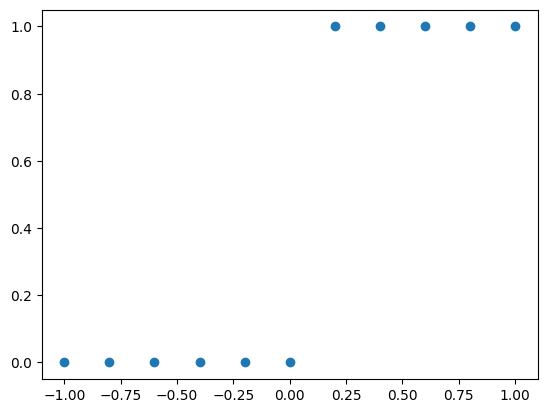

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def H(x):
    return np.where(x > 0, 1, 0)

N = 11
x = np.linspace(-1, 1, N)
y = H(x)

plt.plot(x, y, 'o')

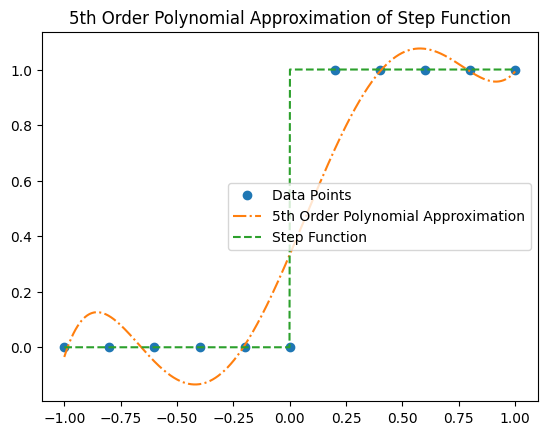

In [40]:
plt.plot(x, y, 'o', label='Data Points')

# Need to change code to fix dimensionality error
A = np.vstack([x**i for i in range(6)]).T 

a, _, _, _ = np.linalg.lstsq(A, y, rcond=None) 

x_fine = np.linspace(-1, 1, 1000)
y_fine = sum(a[i] * (x_fine ** i) for i in range(6)) 

plt.plot(x_fine, y_fine, label="5th Order Polynomial Approximation", linestyle='-.')
plt.plot(x_fine, H(x_fine), label="Step Function", linestyle='--')
plt.title("5th Order Polynomial Approximation of Step Function")
plt.legend()
plt.show()


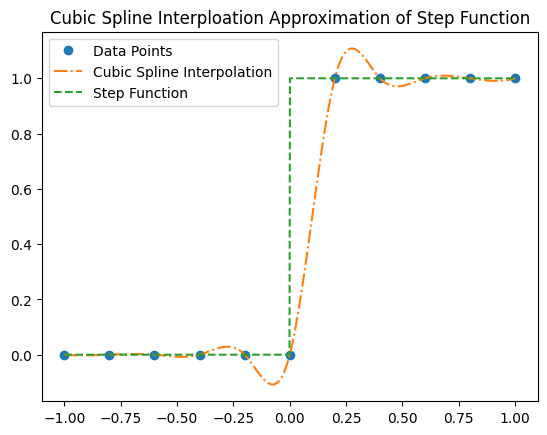

In [41]:
plt.plot(x, y, 'o', label='Data Points')

import scipy.interpolate as interpolate

s = interpolate.CubicSpline(x, y)
y_new = s(x_fine)

plt.plot(x_fine, y_new, label="Cubic Spline Interpolation", linestyle='-.')
plt.plot(x_fine, H(x_fine), label="Step Function", linestyle='--')
plt.title("Cubic Spline Interploation Approximation of Step Function")
plt.legend()
plt.show()


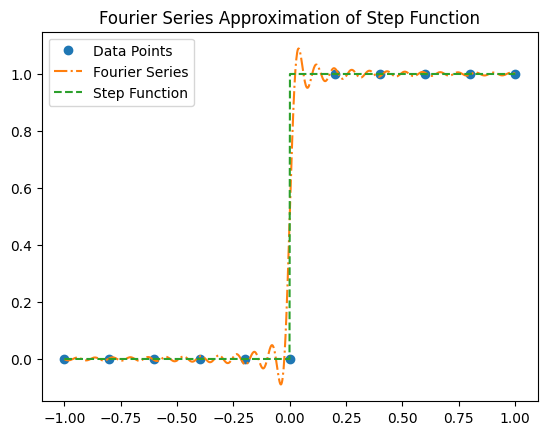

In [44]:
def fourier_series(x, num_terms):
    y_fourier = np.zeros_like(x)
    for i in range(1, num_terms * 2, 2):
        y_fourier += (2 / np.pi) * np.sin(i * x) / i
    y_fourier += 0.5
    return y_fourier

y_fourier = fourier_series(x_fine, 40)

plt.plot(x, y, 'o', label='Data Points')
plt.plot(x_fine, y_fourier, label="Fourier Series", linestyle='-.')
plt.plot(x_fine, H(x_fine), label="Step Function", linestyle='--')
plt.title("Fourier Series Approximation of Step Function")
plt.legend()
plt.show()

Discuss briefly the different approximations (splines, polynomials, Fourier series) in terms of the
ability to capture well the following properties:

1. The sharpness of the discontinuity

- Polynomial: Has trouble, capturing the jump at x = 0
- Spline: Also has some trouble capturing the jump at x = 0 but does a much better job then the polynomial and has a bit of overshoot
- Fourier Series: The higher the number of terms, the better it captures the jump at x = 0 then spline and polynomial. However the larger the number of terms the worse the overshoot is as well

2. The shape away from the discontinuity

- Polynomial: Not great away from the discontinuity. Oscillations deviate from correct shape. 
- Spline: Fit away from discontinuity is relatively good. Much better then the polynomial. Some very slight deviation
- Fourier Series: Shape away from discontinuity much better then polynomial. Lower number of terms shows a bit of ocillation with more number of terms making the overshoot near x=0 worse but the function settles to -1 or 1 much quicker

3. The derivative of H(x)

- Polynomial: Derivative is smooth but inaccuract near discontinuity
- Spline: provides continuous 1st and 2nd derivatives but has issues at the discontinuity
- Fourier Series: As there are oscillations near z = 0 the derivative will also oscillate which makes it innacurate near x = 0. 

4. The magnitude of the discontinuity

- Polynomial: Does not capture the magnitude of the sharp jump at x = 0
- Spline: Captures the magnitude better but with some oscillations
- Fourier Series: shows overshoot near the discontinuity but improves with more terms


Part b)



# **Q2**

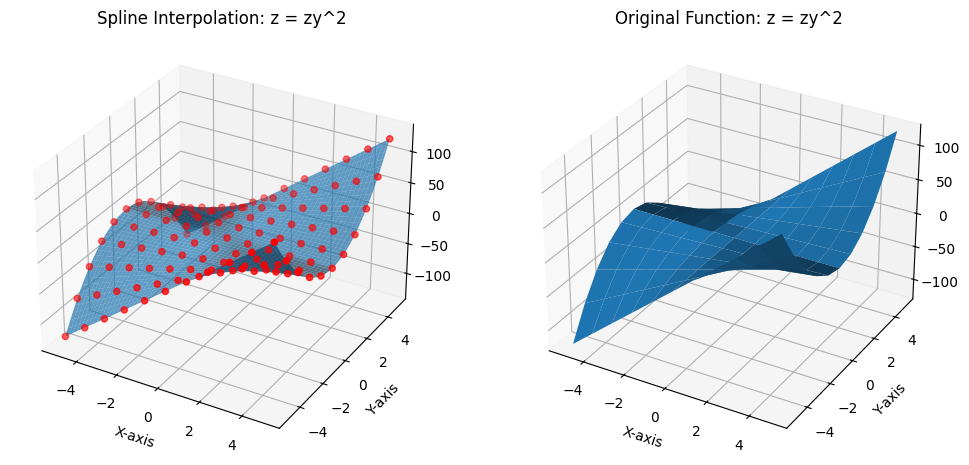

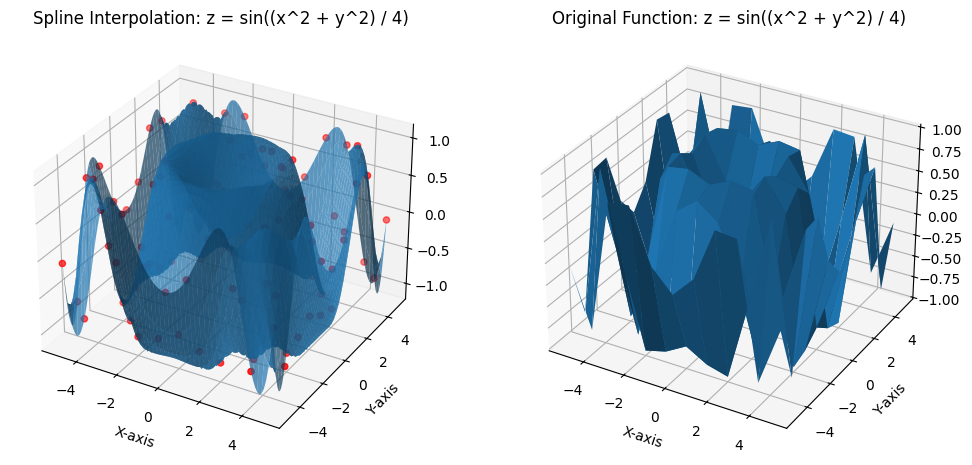

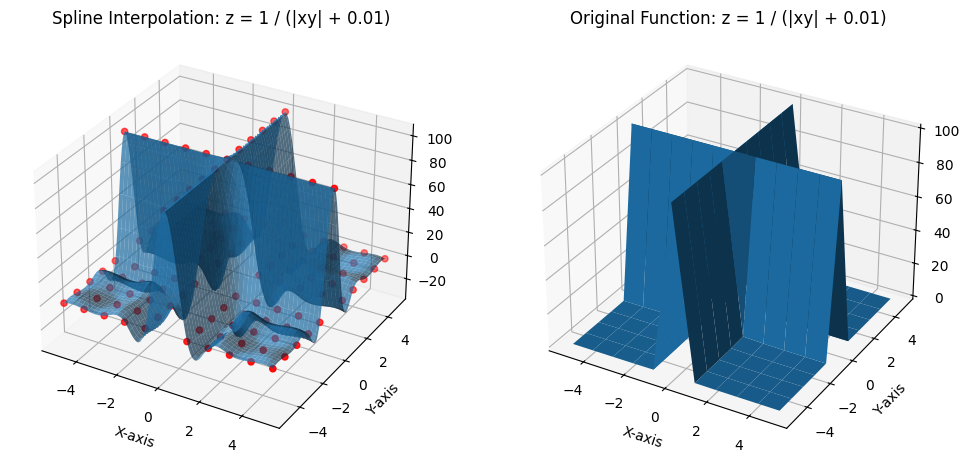

In [36]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import RectBivariateSpline

x = np.linspace(-5, 5, 11)
y = np.linspace(-5, 5, 11)

X, Y = np.meshgrid(x, y)

Z1 = X * Y**2
Z2 = np.sin((X**2 + Y**2) / 4)
Z3 = 1 / (np.abs(X*Y) + 0.01)

x_fine = np.linspace(-5, 5, 100)
y_fine = np.linspace(-5, 5, 100)
X_fine, Y_fine = np.meshgrid(x_fine, y_fine)

spline_f1 = RectBivariateSpline(x, y, Z1)
spline_f2 = RectBivariateSpline(x, y, Z2)
spline_f3 = RectBivariateSpline(x, y, Z3)

Z1_spline = spline_f1(x_fine, y_fine)
Z2_spline = spline_f2(x_fine, y_fine)
Z3_spline = spline_f3(x_fine, y_fine)



def plot_plots(X, Y, Z, X_fine, Y_fine, Z_spline, title):
    fig = plt.figure(figsize=(12,6))

    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(X_fine, Y_fine, Z_spline, alpha=0.7)
    ax1.scatter(X, Y, Z, color='r')
    ax1.set_title(f"Spline Interpolation: {title}")
    ax1.set_xlabel('X-axis')
    ax1.set_ylabel('Y-axis')

    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_surface(X, Y, Z)
    ax2.set_title(f"Original Function: {title}")
    ax2.set_xlabel('X-axis')
    ax2.set_ylabel('Y-axis')


plot_plots(X, Y, Z1, X_fine, Y_fine, Z1_spline, "z = zy^2")
plot_plots(X, Y, Z2, X_fine, Y_fine, Z2_spline, "z = sin((x^2 + y^2) / 4)")
plot_plots(X, Y, Z3, X_fine, Y_fine, Z3_spline, "z = 1 / (|xy| + 0.01)")

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X, Y, Z1, color = 'red', label = 'Datapoints')
# ax.set_title('3D Scatter Plot of Z = xy^2')
# ax.set_xlabel('X-axis')
# ax.set_ylabel('Y-axis')
# ax.set_zlabel('Z-axis')
# plt.show()

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X, Y, Z2, color = 'red', label = 'Datapoints')
# ax.set_title('3D Scatter Plot of Z = sin((x^2 + y^2) / 4)')
# ax.set_xlabel('X-axis')
# ax.set_ylabel('Y-axis')
# ax.set_zlabel('Z-axis')
# plt.show()

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(X, Y, Z3, color = 'red', label = 'Datapoints')
# ax.set_title('3D Scatter Plot of Z = 1 / (|xy| + 0.01)')
# ax.set_xlabel('X-axis')
# ax.set_ylabel('Y-axis')
# ax.set_zlabel('Z-axis')
# plt.show()